# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="../UnityEnvironment/Tennis_Windows_x86_64/Tennis.exe")

demo = False

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('Shape of the states data structure is : {}'.format(env_info.vector_observations.shape))
print('Shape of the rewards data structure is : {}'.format(env_info.rewards))
print('Shape of the local_done data structure is : {}'.format(env_info.local_done))


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
Shape of the states data structure is : (2, 24)
Shape of the rewards data structure is : [0.0, 0.0]
Shape of the local_done data structure is : [False, False]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import time
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from maddpg_agent import MADDPG_Agency
from ddpg_agent import DDPG_Agent

hyperparameters = {
          'algo' :  {   'algo':                                 'ma_ddpg',
                        'n_episodes':                           4000, 
                        'max_t':                                1000,
                        'num_agent':                            2,
                        'add_noise':                            True
                    },
  'agent_maddpg' :  {   'state_size':                           24, 
                        'action_size':                          2, 
                        'nb_agent':                             2,
                        'random_seed':                          2710,
                        'GPU':                                  True,
                        'LEARN_EVERY':                          100,             # How many steps between learning
                        'LEARN_REPEAT':                         20,             # Number of time we sample the buffer
                        'BUFFER_SIZE':                          int(1e6),        # replay buffer size
                        'BATCH_SIZE':                           2048,             # minibatch size
                        'GAMMA':                                0.99,            # discount factor
                        'TAU':                                  1e-3,            # for soft update of target parameters
                        'Actor_network':                        [400, 300],      # Hidden layer in the fully connected Actor network
                        'LR_ACTOR':                             1e-3,            # learning rate of the actor 
                        'Critic_network':                       [400, 300],      # Hidden layer in the fully connected Critic network
                        'LR_CRITIC':                            1e-3,            # learning rate of the critic
                        'WEIGHT_DECAY':                         0,                # L2 weight decay
                        'clip_gradient':                        False
                    },
    'agent_ddpg' :  {   'state_size':                           24, 
                        'action_size':                          2, 
                        'random_seed':                          2710,
                        'GPU':                                  True,
                        'LEARN_EVERY':                          100,             # How many steps between learning
                        'LEARN_REPEAT':                         1,             # Number of time we sample the buffer
                        'BUFFER_SIZE':                          int(1e5),        # replay buffer size
                        'BATCH_SIZE':                           512,             # minibatch size
                        'GAMMA':                                0.99,            # discount factor
                        'TAU':                                  1e-3,            # for soft update of target parameters
                        'Actor_network':                        [400, 300],      # Hidden layer in the fully connected Actor network
                        'LR_ACTOR':                             1e-3,            # learning rate of the actor 
                        'Critic_network':                       [400, 300],      # Hidden layer in the fully connected Critic network
                        'LR_CRITIC':                            1e-3,            # learning rate of the critic
                        'WEIGHT_DECAY':                         0,                # L2 weight decay
                        'clip_gradient':                        False
                    },
        }

if (hyperparameters['algo']['algo'] == 'double_ddpg'):
    agent_1 = DDPG_Agent(**hyperparameters['agent_ddpg'])
    agent_2 = DDPG_Agent(**hyperparameters['agent_ddpg'])
else:
    agent = MADDPG_Agency(**hyperparameters['agent_maddpg'])

Running on GPU


In [8]:
def maddpg(algo=None, n_episodes=1000, max_t=1001, num_agent=num_agents, add_noise=True):
    scores_deque = deque(maxlen=100)
    scores = []
    #max_score = -np.Inf
    max_score = 0.001
    solved = False

    for i_episode in range(1, n_episodes+1):
        
        steps = 0   
        start_time = time.time()
        
        states = env.reset(train_mode=True)[brain_name].vector_observations
        agent.reset()
        score = np.zeros(num_agent)
        for t in range(max_t):

            actions = agent.act(states, add_noise)             # return actions for each agent according to their states

            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished

            agent.step(states, actions, rewards, next_states, dones)
            
            score += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step

            steps += 1

            if np.any(dones):
                break 

        episode_score = np.max(score)
        scores_deque.append(episode_score)
        scores.append(episode_score)
        over100_score = np.mean(scores_deque)

        if (agent.optimized):
            for a in agent.agents:
                a.actor_scheduler.step()
                a.critic_scheduler.step()
            agent.optimized = False

        print('\rEpisode {0:4} in {1:5.2f}s.\tSteps: {6:4}\tScore: {2:6.3f}\tAverage Score: {3:6.3f}\tLrA: {4:.1e}\tSigma: {5:.1e}'.format( i_episode, 
                                                                                                       time.time()-start_time, 
                                                                                                       episode_score, 
                                                                                                       over100_score, 
                                                                                                       agent.agents[0].actor_optimizer.param_groups[0]['lr'],
                                                                                                       agent.agents[0].noise.sigma,
                                                                                                       steps
                                                                                                       ), end="")
        if i_episode == 1000:
            for a in agent.agents:
                a.noise.sigma = 0.2
        
        if i_episode == 2000:
            for a in agent.agents:
                a.noise.sigma = 0.1
                
        if i_episode % 1000 == 0 :
            agent.save(i_episode)

        if  int(over100_score) > int(max_score) :
            max_score = over100_score
            agent.save(int(max_score))
        
        if over100_score > 0.5 and not solved:
            solved = True
            print('\rProblem solved in {} episodes, score = {}                                              '.format(i_episode, over100_score))
            agent.save('_solved')
            #break

        if i_episode % 200 == 0 :
            print('\rEpisode {0:4} in {1:5.2f}s.\tScore: {2:6.3f}\tAverage Score: {3:6.3f}\tLrA: {4:.1e}\tSigma: {5:.1e}'.format( i_episode, 
                                                                                                       time.time()-start_time, 
                                                                                                       episode_score, 
                                                                                                       over100_score, 
                                                                                                       agent.agents[0].actor_optimizer.param_groups[0]['lr'],
                                                                                                       agent.agents[0].noise.sigma ))

    agent.save('_max')
    return scores

In [9]:
def double_ddpg(algo=None, n_episodes=1000, max_t=1001, num_agent=num_agents, add_noise=True):
    scores_deque = deque(maxlen=100)
    scores = []
    #max_score = -np.Inf
    max_score = 0.5
    solved = False

    for i_episode in range(1, n_episodes+1):
        
        steps = 0   
        start_time = time.time()
        
        states = env.reset(train_mode=True)[brain_name].vector_observations
        agent_1.reset()
        agent_2.reset()
        score = np.zeros(num_agent)
        backup_score = []
        for t in range(max_t):
            actions =   [
                        agent_1.act(states[0], add_noise),             # return actions for each agent according to their states
                        agent_2.act(states[1], add_noise)             # return actions for each agent according to their states
                        ]
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            backup_score.append((t, rewards[0], rewards[1]))   
            #_info(rewards, texte="Rewards", block=True)
            dones = env_info.local_done                        # see if episode finished

            agent_1.step(states[0], actions[0], rewards[0], next_states[0], dones[0])
            agent_2.step(states[1], actions[1], rewards[1], next_states[1], dones[1])
            score += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            steps += 1
            if np.any(dones):
                break 

        #_info(backup_score, texte="Tableau", block=True)
        episode_score = np.max(score)
        scores_deque.append(episode_score)
        scores.append(episode_score)
        over100_score = np.mean(scores_deque)

        print('\rEpisode {0:4} in {1:5.2f}s.\tSteps: {6:4}\tScore: {2:6.3f}\tAverage Score: {3:6.3f}\tLrA: {4:.1e}\tLrC: {5:.1e}\tStat p1: {7}\tStat p2: {8}'.format( i_episode, 
                                                                                                       time.time()-start_time, 
                                                                                                       episode_score, 
                                                                                                       over100_score, 
                                                                                                       agent_1.actor_optimizer.param_groups[0]['lr'],
                                                                                                       agent_1.critic_optimizer.param_groups[0]['lr'],
                                                                                                       steps,
                                                                                                       agent_1.memory.stats(),
                                                                                                       agent_2.memory.stats()
                                                                                                       ), end="")
        if i_episode % 1000 == 0 :
            agent_1.save(0, i_episode)
            agent_2.save(1, i_episode)

        if int(over100_score) > int(max_score) :
            max_score = over100_score
            agent_1.save(0, int(max_score))
            agent_2.save(1, int(max_score))
        
        if over100_score > 0.5 and not solved:
            solved = True
            print('\rProblem solved in {} episodes, score = {}'.format(i_episode, over100_score))
            agent_1.save(0, int(max_score))
            agent_2.save(1, int(max_score))
            #break

        if i_episode % 200 == 0 :
            print('\rEpisode {0:4} in {1:5.2f}s.\tScore: {2:6.3f}\tAverage Score: {3:6.3f}\tLrA: {4:.1e}\tLrC: {5:.1e}'.format( i_episode, 
                                                                                                       time.time()-start_time, 
                                                                                                       episode_score, 
                                                                                                       over100_score, 
                                                                                                       agent_1.actor_optimizer.param_groups[0]['lr'],
                                                                                                       agent_1.critic_optimizer.param_groups[0]['lr'] ))

    agent_1.save(0, 'max')
    agent_2.save(1, 'max')
    return scores

In [10]:
if demo :
    print("Demo Mode")
    # Load model weigth from trained agents
    agent.load(5000)

    for i in range(1, 6):

        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            actions = agent.act(states, False)

            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Training Mode
Episode  200 in  0.05s.	Score:  0.000	Average Score:  0.002	LrA: 1.0e-03	Sigma: 6.0e-01
Episode  400 in  0.05s.	Score:  0.000	Average Score:  0.005	LrA: 1.0e-03	Sigma: 6.0e-01
Episode  600 in  0.11s.	Score:  0.100	Average Score:  0.013	LrA: 1.0e-03	Sigma: 6.0e-01
Episode  800 in  0.05s.	Score:  0.000	Average Score:  0.010	LrA: 1.0e-03	Sigma: 6.0e-01
Episode 1000 in  0.05s.	Score:  0.000	Average Score:  0.012	LrA: 1.0e-03	Sigma: 2.0e-01
Episode 1200 in  0.10s.	Score:  0.090	Average Score:  0.019	LrA: 1.0e-03	Sigma: 2.0e-01
Episode 1400 in  9.97s.	Score:  0.090	Average Score:  0.023	LrA: 1.0e-03	Sigma: 2.0e-01
Episode 1600 in  0.05s.	Score:  0.000	Average Score:  0.050	LrA: 1.0e-03	Sigma: 2.0e-01
Episode 1800 in  0.15s.	Score:  0.100	Average Score:  0.071	LrA: 1.0e-03	Sigma: 2.0e-01
Episode 2000 in  9.84s.	Score:  0.100	Average Score:  0.093	LrA: 1.0e-03	Sigma: 1.0e-01
Episode 2200 in  0.10s.	Score:  0.090	Average Score:  0.095	LrA: 1.0e-03	Sigma: 1.0e-01
Episode 2400 in  0

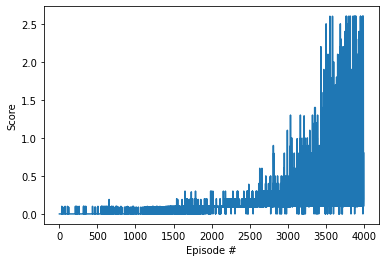

In [11]:
if not demo :

    print("Training Mode")

    if (hyperparameters['algo']['algo'] == 'double_ddpg'):
        scores = double_ddpg(**hyperparameters['algo'])
    else:
        scores = maddpg(**hyperparameters['algo'])
    

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

When finished, you can close the environment.

In [12]:
env.close()